In [1]:
import math
import os
import main1
from angles_to_slopes import angles_to_slopes
import find_best
import cv2
import matplotlib.pyplot as plt
from generate_average_angles import generate_average_angles

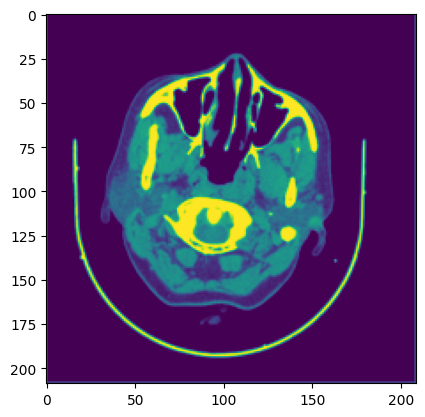

In [429]:
##读图像
image= cv2.imread(r"C:\Users\asus\Desktop\shiyan\CT-490(1).png",0) 
plt.imshow(image)

In [404]:
##确定斜率，函数的意思是把180份平均分为9份并转为对应的斜率
slopes=angles_to_slopes(generate_average_angles(180,9))

In [421]:
##指定特定的斜率
slopes=[
 -14.300666256711942,
 -11.430052302761348,
 -9.514364454222587,
 -8.144346427974593,
 -7.115369722384207,
 -6.313751514675041,
 -5.671281819617707,
 -5.144554015970307,
 -4.704630109478451,
 -4.331475874284157,
 -4.0107809335358455,
 -3.7320508075688776,
 -3.4874144438409087,
 -3.2708526184841404,
 -3.0776835371752527,
 -2.904210877675822,
 -2.7474774194546216,
 -2.6050890646938005,
 -2.4750868534162964,
 -2.355852365823753,
 -2.2460367739042164,
]

In [409]:
##为了初步筛选看到返回的斜率对应的度数    
def slope_to_angle(slope):  
    # 使用math.atan计算斜率对应的弧度值  
    radians = math.atan(slope)  
    # 将弧度值转换为度数值  
    degrees = math.degrees(radians)  
    return degrees  
  
# 示例斜率  
slope_value = -5.671281819617711# 例如斜率为1，即45度角  
angle = slope_to_angle(slope_value)  
print(f"斜率 {slope_value} 对应的角度是 {angle} 度。")

斜率 -5.671281819617711 对应的角度是 -80.00000000000001 度。


In [410]:
##初步筛选得到的最优度数然后加减20°
a=[]
for i in range(int(angle)-20,int(angle)+21):
    a.append(i)

In [411]:
a

[-100,
 -99,
 -98,
 -97,
 -96,
 -95,
 -94,
 -93,
 -92,
 -91,
 -90,
 -89,
 -88,
 -87,
 -86,
 -85,
 -84,
 -83,
 -82,
 -81,
 -80,
 -79,
 -78,
 -77,
 -76,
 -75,
 -74,
 -73,
 -72,
 -71,
 -70,
 -69,
 -68,
 -67,
 -66,
 -65,
 -64,
 -63,
 -62,
 -61,
 -60]

In [412]:
##得到的细化变为斜率
angles_to_slopes(a)

[5.671281819617711,
 6.313751514675046,
 7.115369722384213,
 8.144346427974602,
 9.514364454222576,
 11.430052302761336,
 14.30066625671192,
 19.081136687728208,
 28.636253282915614,
 57.28996163075955,
 -1.633123935319537e+16,
 -57.289961630759144,
 -28.636253282915515,
 -19.08113668772816,
 -14.300666256711942,
 -11.430052302761348,
 -9.514364454222587,
 -8.144346427974593,
 -7.115369722384207,
 -6.313751514675041,
 -5.671281819617707,
 -5.144554015970307,
 -4.704630109478451,
 -4.331475874284157,
 -4.0107809335358455,
 -3.7320508075688776,
 -3.4874144438409087,
 -3.2708526184841404,
 -3.0776835371752527,
 -2.904210877675822,
 -2.7474774194546216,
 -2.6050890646938005,
 -2.4750868534162964,
 -2.355852365823753,
 -2.2460367739042164,
 -2.1445069205095586,
 -2.050303841579296,
 -1.9626105055051504,
 -1.8807264653463318,
 -1.8040477552714236,
 -1.7320508075688767]

In [430]:
##主要的计算步骤，得到每个距离，列名是对应的斜率，行名是上下移动的像素值
df1=main1.main(image,slopes,25)

      -14.300666   -11.430052   -9.514364    -8.144346    -7.115370   \
 0   2605.214888  2566.202653  2510.964634  2471.393575  2479.644604   
-1   2643.323863  2565.364313  2520.386704  2489.882366  2484.707763   
 1   2581.829811   2560.97621  2501.491114  2475.367979  2494.834865   
-2    2696.88147  2575.807606  2490.763145  2508.481294  2450.569007   
 2   2605.857973  2600.383889  2528.250049  2472.464361   2520.41274   
..           ...          ...          ...          ...          ...   
 60  2796.290168  2883.595764  3160.259505  3302.521579  3373.338038   
-61  2730.115963  2729.828478  2809.019582  2746.354878   2750.64467   
 61    2794.8379  2888.247319  3069.983834  3288.692182  3450.641538   
-62  2741.009086  2757.834886  2804.609555  2769.517239  2768.057452   
 62  2797.058017  2901.188333  3123.164906  3316.145733  3518.007291   

      -6.313752    -5.671282    -5.144554    -4.704630    -4.331476   ...  \
 0   2435.112197  2397.493409   2415.86894  2397.147564  2

In [432]:
#得到距离最小对应的移动距离和斜率
find_best.find_best(df1)

最小值：2236.4980541744735
行名：-23
列名：-3.4874144438409087


In [378]:
# 打开文件并读取内容 (标注的数据)
with open(r'C:\Users\asus\Desktop\data\220.fcsv', 'r') as file:  
    lines = file.readlines()  
  
##### 跳过文件头部，找到数据部分的开始  
header_lines = 3  # 假设文件头部有3行  
data_lines = lines[header_lines:]  
# 提取x和y坐标  
pt1 = []  
pt2 = []  
for line in data_lines:  
    # 分割每行内容  
    parts = line.strip().split(',')  
    # 提取x和y坐标（注意索引可能需要根据实际的列顺序调整）  
    x_coord = float(parts[1])  
    y_coord = float(parts[2])  
    # 添加到列表中  
    pt1.append(x_coord)  
    pt1.append(y_coord)  
  

print("坐标点是:",pt1 )  
##四个数分别是两个点的横纵坐标

坐标点是: [160.4180854880165, -0.08800384122058347, 122.5539251559282, 298.14861447484526]


In [426]:
##这个是为了针对上面的最优的斜率和截距所对应的线段来计算这一条直线与图像边缘的交点，根据两个点来画出这条直线。
from sympy import symbols, Eq, solve  
import cv2
import numpy  as np 
import matplotlib.pyplot as plt
import math
def find_intersections(j,i,center_x,center_y,x_max,y_max):  ###j是斜率，i是平移的方向和距离，centet_x和center_y是中心点，max则是这个图片大小
    # 初始化交点列表  
    intersections = []  
      
    # 检查直线与矩形顶部的交点(y=0,x是变量) 
    x = symbols('x')  
  
    # 定义方程  
    equation_top = Eq(0-(center_y)-j*(x-(center_x))+(-1) ** i * i // 2, 0)  
  
    # 使用solve解方程  
    x_top = solve(equation_top, x)  
    if 0<=x_top[0]<=x_max:
        intersections.append((x_top[0],0)) 
    # 检查直线与矩形底部的交点(y=y_max,x是变量)   
    # 定义方程  
    equation_top = Eq(y_max-(center_y)-j*(x-(center_x))+(-1) ** i * i // 2, 0)  
  
    # 使用solve解方程  
    x_bottom = solve(equation_top, x)  
    if 0<=x_bottom[0]<=x_max:
        intersections.append((x_bottom[0],y_max))
        
    # 检查直线与矩形左侧的交点(x=0,y是变量)
    y = symbols('y')  
  
    # 定义方程  
    equation_top = Eq(y-(center_y)-j*(0-(center_x))+(-1) ** i * i // 2, 0)  
  
    # 使用solve解方程  
    y_left = solve(equation_top, y)  
    if 0<=y_left[0]<=y_max:
        intersections.append((0,y_left[0]))  
  
    # 检查直线与矩形右侧的交点(x=x_max,y是变量)    
    # 定义方程  
    equation_top = Eq(y-(center_y)-j*(x_max-(center_x))+(-1) ** i * i // 2, 0)  
  
    # 使用solve解方程  
    y_right = solve(equation_top, y)  
    if 0<=y_right[0]<=y_max:
        intersections.append((x_max,y_right[0])) 
  
    return intersections  
  
# 调用函数找到交点  
intersections = find_intersections(-3.4874144438409087,-23,105,105,209,209)  
print(intersections)  # 输出交点列表

[(131.954066261328, 0), (72.0242806377369, 209)]


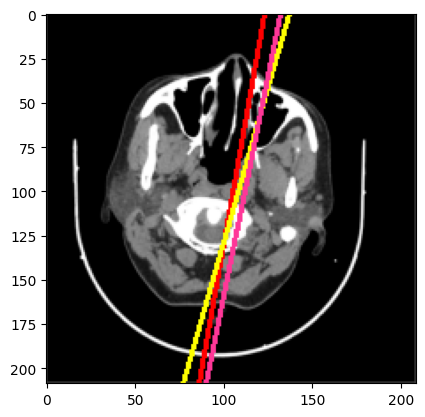

In [427]:
image= cv2.imread(r"C:\Users\asus\Desktop\shiyan\CT-490(1).png" )
# 画线，这里使用蓝色，线宽2  
cv2.line(image, (123, 0), (86, 209),(255, 0, 0),2)####红色是初步预测的
cv2.line(image, (137, 0), (77, 209),(255, 255, 0),2)###黄色是进一步预测
cv2.line(image, (132, 0), (72, 299),(255, 55, 152),2)###紫色是实际
#cv2.line(image, (175, 0), (122, 299),(155, 155, 152),2)###灰色是分9分的初步预测
plt.imshow(image)